In [23]:
%matplotlib inline

In [24]:
import numpy as np

In [25]:
import pandas as pd

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [28]:
credit_df = pd.read_csv("credit.csv")

In [29]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [30]:
credit_df.head(5)  #let us look at the raw data. As is evident, there are lot of missing values 

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [31]:
credit_df.shape

(1000, 17)

In [32]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [33]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [34]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [35]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


In [36]:
col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

In [37]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [38]:
# splitting data into training and test set for independent attributes
train_set = credit_df.head(700) # Up to the last initial training set row
test_set = credit_df.tail(300) # Past the last initial training set row

In [39]:
train_set.head(4).T

,0,1,2,3
checking_balance,1,0,3,1
months_loan_duration,6,48,12,42
credit_history,0,1,0,1
purpose,4,4,3,4
amount,1169,5951,2096,7882
savings_balance,4,2,2,2
employment_duration,3,0,1,1
percent_of_income,4,2,2,2
years_at_residence,4,2,3,4
age,67,22,49,45


In [40]:
#train_set.pop("default")

In [41]:
# capture the target column ("default") into separate vectors for training set and test set
train_labels = train_set.pop("default")
test_labels = test_set.pop("default")

In [42]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [43]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
dt_model.score(train_set , train_labels)

1.0

In [45]:
test_pred = dt_model.predict(test_set)

In [46]:
dt_model.score(test_set , test_labels)

0.6666666666666666

### Regularising the Decision Tree

In [47]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
test_pred = dt_model.predict(test_set)

In [49]:
dt_model.score(train_set , train_labels)

0.7828571428571428

In [50]:
dt_model.score(test_set , test_labels)

0.7233333333333334

# Ensemble Learning - Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )

In [53]:
#bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
#bgcl = BaggingClassifier(n_estimators=50)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lrModel = LogisticRegression()

In [56]:
bgcl = BaggingClassifier(base_estimator=lrModel, n_estimators=50)

In [57]:
bgcl = bgcl.fit(train_set, train_labels)

In [58]:
bgcl.score(train_set , train_labels)

0.7257142857142858

In [59]:
bgcl.score(test_set , test_labels)

0.7233333333333334

In [60]:
NDP = test_set.head(1)

In [61]:
bgcl.predict(NDP)

array([0], dtype=int8)

# Ensemble Learning - AdaBoosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )

In [64]:
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)

In [65]:
abcl = AdaBoostClassifier(base_estimator=lrModel, n_estimators=50)

In [66]:
abcl = abcl.fit(train_set, train_labels)

In [67]:
abcl.score(train_set, train_labels)

0.72

In [68]:
abcl.score(test_set , test_labels)

0.72

# Ensemble RandomForest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfcl = RandomForestClassifier(n_estimators = 6)

In [71]:
rfcl = rfcl.fit(train_set, train_labels)

In [72]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.72

# Feature Importance from Random Forest Model

In [80]:
indices = np.argsort(rfcl.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_set.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_set.columns[indices[f]],
                         rfcl.feature_importances_[indices[f]]]

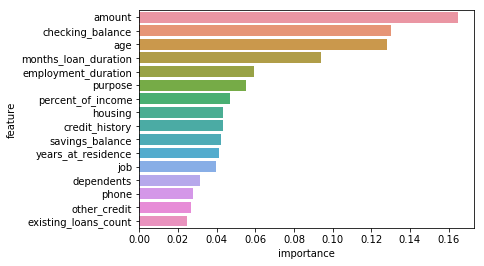

In [82]:
import seaborn as sns
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

# Summarizing Models Performance

In [83]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics

In [85]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = LogisticRegression()
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier(max_depth=10)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5], ['KNN', 'Logistic Regression', 'Naive Bayes', 'DT1', 'DT2']):
    scores = model_selection.cross_val_score(clf, train_set, train_labels, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.68 (+/- 0.02) [KNN]
Accuracy: 0.70 (+/- 0.05) [Logistic Regression]
Accuracy: 0.70 (+/- 0.06) [Naive Bayes]
Accuracy: 0.66 (+/- 0.05) [DT1]
Accuracy: 0.69 (+/- 0.06) [DT2]
